<div style="background-color:#FFF4CE; padding:25px; border-radius:10px;">
  <h1 style="color:#333333; text-align:center;">🚖 NYC Yellow Taxi Trip Analysis | January 2023</h1>
  <p style="font-size:16px; text-align:center; color:#444444;">
    Explore how millions of taxi rides reflect urban behavior, commuter trends, and economic signals in the heart of NYC.
  </p>
</div>


<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
  <h1 style="color: #2C2C2C ; font-size: 28px; font-weight: bold; margin: 0; text-align:center">
    Import Basic Libraries
  </h1>
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/tlc-yellow-taxi-trips/data_dictionary_trip_records_yellow.pdf
/kaggle/input/tlc-yellow-taxi-trips/yellow_tripdata_2023-01.parquet
/kaggle/input/tlc-yellow-taxi-trips/working_parquet_format.pdf
/kaggle/input/tlc-yellow-taxi-trips/taxi_zone_lookup.csv
/kaggle/input/tlc-yellow-taxi-trips/trip_record_user_guide.pdf
/kaggle/input/tlc-yellow-taxi-trips-dataset/data_dictionary_trip_records_yellow.pdf
/kaggle/input/tlc-yellow-taxi-trips-dataset/yellow_tripdata_2023-01.parquet
/kaggle/input/tlc-yellow-taxi-trips-dataset/working_parquet_format.pdf
/kaggle/input/tlc-yellow-taxi-trips-dataset/taxi_zone_lookup.csv
/kaggle/input/tlc-yellow-taxi-trips-dataset/trip_record_user_guide.pdf



## 🔗 Table of Content 
1. [Introduction](#intro)
2. [Data Pre-processing](#prep) 
    - [2.1 Load Data](#load)
    - [2.2 Missing Values](#missing)
    - [2.3 Data Types](#types)
    - [2.4 Feature Engineering](#engineering)
          - [Data Preparation]
          - [Mapping]
          - [Merging NYC Taxi Trip Data Tables]
          - [Taxi Trip Time Features Extraction]
    - [2.5 Handle Outliers](#outliers)
3. [Exploratory Data Analysis (EDA)](#eda)
    - [Distrubution plot](#dist)
    - [Peak Demand Analysis(Revenue Maximixation](#peak)
    - [Trip Duration & Distance Patterm](#trip)
    - [Revenue Leakeges & No-tip Case](#tip)
    - [Fare vs Total Amount](#fare)
    - [Payment Method Trends](#payment)
    - [Airport Trip Analysis](#airport)
    - [Borough Wise Revenue and Trip Density plot](#borough)
    - [Congestion Surcharge & Toll Impact](#toll)
5. [Insights](#insights)
6. [Reccomendation](#reccomend)
7. [Conclusion](#conclusion)
   
   

# <a id = 'intro'></a>
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h1 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  1. Introduction
</h1>



# 🚕 NYC Yellow Taxi Trip Analysis | January 2023

In the bustling streets of New York City, yellow taxis have long been a symbol of urban mobility. With millions of rides logged monthly, taxi trip data provides valuable insights into city life, commuter behavior, and transportation economics.

---

### 📅 Why January 2023?

January marks a seasonal shift in city activity — colder weather, fewer tourists, and new year routines. It's also a time when fare policies, congestion surcharges, and driver availability may shift. Analyzing January 2023 offers a fresh snapshot into how the city's taxi infrastructure adapts post-holiday.

---

### 🎯 Objectives of This Analysis

- Understand **trip volume and duration** patterns across hours and days
- Identify **peak demand times** and **popular pickup/drop-off zones**
- Examine **fare distribution**, **passenger counts**, and **payment types**
- Analyze **airport and borough-wise trip behaviors**
- Assess the **impact of congestion surcharge** during peak hours

---

> This analysis not only sheds light on how New Yorkers move around — it also helps transport authorities, data scientists, and city planners make informed decisions.

Let’s explore the data behind the wheel! 🛺


## 🗃️ Dataset Overview

The NYC Yellow Taxi Trip dataset for January 2023 contains **3.07 million records** and **19 columns**, each representing a unique ride completed within NYC.
<div style="background-color: #FFF8E7; padding: 25px; border-radius: 10px; border: 1px solid #FFD700; font-family: 'Segoe UI', sans-serif;">

<h2 style="color: #D35400; text-align: center;">📋 NYC Yellow Taxi Trip Dataset - Column Descriptions</h2>

<p>This dataset includes trip-level information for NYC Yellow Taxis in January 2023. Below is a summary of each column and what it represents:</p>
<h3>📘 NYC Yellow Taxi Trip Dataset - Column Descriptions</h3>




 - VendorID : TPEP provider code (1=Creative Mobile Technologies, LLC; 2=VeriFone Inc.).
 - tpep_pickup_datetime : Date and time when the meter was engaged.
 - tpep_dropoff_datetime : Date and time when the meter was disengaged.
 - passenger_count : Number of passengers (driver-entered value).
 - trip_distance` *(miles)* : Distance in miles reported by the taximeter.
 - RatecodeID : Final rate code (1=Standard rate; 2=JFK; 3=Newark; 4=Nassau or Westchester; 5=Negotiated fare; 6=Group ride).
 - store_and_fwd_flag : Indicates if the trip record was stored in vehicle memory before being sent to the vendor (Y=store and forward trip; N=not a store and forward trip).
 - PULocationID : TLC Taxi Zone where the meter was engaged.
 - DOLocationID : TLC Taxi Zone where the meter was disengaged
 - payment_type :  Payment method (1=Credit card; 2=Cash; 3=No charge; 4=Dispute; 5=Unknown; 6=Voided trip).
 - fare_amount` *(USD)* : Fare calculated by the meter.
 - extra` *(USD)* : Miscellaneous extras and surcharges (e.g., rush hour and overnight charges).
 - mta_tax` *(USD)* : 0.50 MTA tax based on the metered rate.
 - tip_amount` *(USD)* : Tip amount (credit card tips only).
 - tolls_amount` *(USD)* : Total tolls paid during the trip.
 - total_amount : Total amount charged to passengers (excluding cash tips).
 - congestion_surcharge` *(USD)* : Congestion charge (if applicable)
 - airport_fee` *(USD)* :  Airport access fee 


# <a id = 'prep'></a> 
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h1 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  2. DATA PRE-PROCESSING
</h1>



## <a id = 'load'></a> 
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h2 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  2.1 Load Data
</h2>


 -  Note : The  Yellow Taxi Dataset is in Parquet Format 

In [2]:
taxi_trip_df = pd.read_parquet(r"/kaggle/input/tlc-yellow-taxi-trips/yellow_tripdata_2023-01.parquet")
taxi_zone_df = pd.read_csv(r"/kaggle/input/tlc-yellow-taxi-trips/taxi_zone_lookup.csv")

In [3]:
# the output is being auto-truncated due to  Kaggle’s notebook UI or Pandas display settings. 
# by inforcing the show_counts in info() function , we can get the non-null counts
print('*'*5,'Yellow Taxi Trip Data Info','*'*5)
print(taxi_trip_df.info(show_counts=True))

***** Yellow Taxi Trip Data Info *****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               3066766 non-null  int64         
 1   tpep_pickup_datetime   3066766 non-null  datetime64[us]
 2   tpep_dropoff_datetime  3066766 non-null  datetime64[us]
 3   passenger_count        2995023 non-null  float64       
 4   trip_distance          3066766 non-null  float64       
 5   RatecodeID             2995023 non-null  float64       
 6   store_and_fwd_flag     2995023 non-null  object        
 7   PULocationID           3066766 non-null  int64         
 8   DOLocationID           3066766 non-null  int64         
 9   payment_type           3066766 non-null  int64         
 10  fare_amount            3066766 non-null  float64       
 11  extra                  3066766 non-null  float64  

In [4]:
# total number of rows in dataset 
print(f"Number of Rows: {taxi_trip_df.shape[0]}")

Number of Rows: 3066766


## <a id = 'missing'></a> 
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h2 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  2.2 Missing Values
</h2>

#### A code indicating the TPEP provider that provided the record.  
- 1 = Creative Mobile Technologies, LLC 
- 2 = Curb Mobility, LLC 

In [5]:
# total number of null values in each column 
taxi_trip_df.isnull().sum()
# 71743 record has null values in passenger count 

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [6]:
print(taxi_trip_df[taxi_trip_df['passenger_count'].isnull()]['VendorID'].value_counts(normalize=True)*100)


VendorID
2    65.63149
1    34.36851
Name: proportion, dtype: float64


#### A numeric code signifying how the passenger paid for the trip. 
- 0 = Flex Fare trip 
- 1 = Credit card 
- 2 = Cash 
- 3 = No charge 
- 4 = Dispute 
- 5 = Unknown 
- 6 = Voided trip 

In [7]:
# No of records where the passenger count is null and their respective payment type 
taxi_trip_df[taxi_trip_df['passenger_count'].isnull()]['payment_type'].value_counts()

payment_type
0    71743
Name: count, dtype: int64

In [8]:
#  Around 66% of null dataset where provided by Vendor ID 2 (Creative Mobile Technologies LLC)
#  Need to Advice Creative Mobile Technologies LLC to cross-verify their data, and maintain the quality and integrity of trip dataset
#  ALL the Null record of passenger_count has payment type 0 (Flex Fare trip )

In [9]:
#  dropping the rows where passenger count is missing 
taxi_trip_df.dropna(subset = 'passenger_count',inplace=True)

In [10]:
#  there is no Null value left in the dataset 
print(taxi_trip_df.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


## <a id='types'></a> 
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h2 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  2.3 Data Type Conversion
</h2>


In [11]:
taxi_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2995023 entries, 0 to 2995022
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [12]:
#  Every Field has the appropiate datatype , No need to change it.

## <a id ='engineering'></a> 
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h2 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  2.4 Feature Engineering
</h2>



## **Data Preparation**


In [13]:
# any fare/charge cant be negative 
taxi_trip_df['fare_amount'] = taxi_trip_df['fare_amount'].abs()
taxi_trip_df['extra'] = taxi_trip_df['extra'].abs()
taxi_trip_df['mta_tax'] = taxi_trip_df['mta_tax'].abs()
taxi_trip_df['tip_amount'] = taxi_trip_df['tip_amount'].abs()
taxi_trip_df['tolls_amount'] = taxi_trip_df['tolls_amount'].abs()
taxi_trip_df['congestion_surcharge'] = taxi_trip_df['congestion_surcharge'].abs()
taxi_trip_df['airport_fee'] = taxi_trip_df['airport_fee'].abs()
taxi_trip_df['improvement_surcharge'] = taxi_trip_df['improvement_surcharge'].abs()
taxi_trip_df['total_amount'] = taxi_trip_df['total_amount'].abs()

In [14]:
#  traits of a cancalled trip 
#  less than a mile distance is covered, 
# total fare or fare amount is zero ,
#  PUL=DOL
cancelled_trips = taxi_trip_df[(taxi_trip_df['trip_distance']<1) & 
                (taxi_trip_df['total_amount']==0) &
                (taxi_trip_df['PULocationID']==taxi_trip_df['DOLocationID'])
]
print(f"cancelled_trips:{cancelled_trips.size}")

cancelled_trips:7106


## **Mapping**
- **Mapping VendorID ,RatecodeID and PaymentID**

In [15]:
map_vendor= {1:'CMT',2:'Curb Mobility'}
map_ratecodeid = {1:'Standard rate' ,2:'JFK' ,3:'Newark' ,4:'Nassau or Westchester' ,5:'Negotiated fare' ,6:'Group ride' ,99:'Null/unknown' }
map_payment = {1:'Credit Card',2:'cash',3:'No Charge',4:'Dispute'}
taxi_trip_df['VendorID']=taxi_trip_df['VendorID'].map(map_vendor)
taxi_trip_df['trip_duration'] = ((taxi_trip_df['tpep_dropoff_datetime']-taxi_trip_df['tpep_pickup_datetime']).dt.total_seconds()/60).round()
taxi_trip_df['Ratecode'] = taxi_trip_df['RatecodeID'].map(map_ratecodeid)
taxi_trip_df['payment_mode'] = taxi_trip_df['payment_type'].map(map_payment)

## **Merging NYC Taxi Trip Data Tables**

In [16]:

taxi_trip_df = taxi_trip_df.merge(taxi_zone_df,left_on='PULocationID',right_on='LocationID',how='left').rename(columns = {'LocationID':'PULocation','Borough':'PUBorough','Zone':'PUZone','service_zone':'PU_service_zone'})
taxi_trip_df = taxi_trip_df.merge(taxi_zone_df,left_on='DOLocationID',right_on='LocationID',how='left').rename(columns = {'LocationID':'DOLocation','Borough':'DOBorough','Zone':'DOZone','service_zone':'DO_service_zone'})

In [17]:
# Get Rid of Unecessary Columns or fields
taxi_trip_df = taxi_trip_df.drop(['RatecodeID','payment_type','PULocationID','DOLocationID'],axis=1)

In [18]:
# Reassigning the Total amount as the error found in Data entry 
taxi_trip_df['total_amount'] = (
    taxi_trip_df['fare_amount']
  + taxi_trip_df['extra']
  + taxi_trip_df['mta_tax']
  + taxi_trip_df['tip_amount']
  + taxi_trip_df['tolls_amount']
  + taxi_trip_df['improvement_surcharge']
  + taxi_trip_df['congestion_surcharge']
  + taxi_trip_df['airport_fee']
)


In [19]:
#  function to do binary classification for hours  
def hour_classify(hour):
    if 0<=hour<6:
        return 'Early Morning'
    elif 6<=hour<11:
        return 'Morning Rush'
    elif 11<=hour<16:
        return 'Midday'
    elif 16<=hour<20:
        return 'Evening Rush'
    else:
        return 'Night'

#  classify weekend and weekday
def classify_day_type(day_name):
    return 'Weekend' if day_name in ['Saturday', 'Sunday'] else 'Weekday'

##  **Taxi Trip Time Features Extraction**


In [20]:
taxi_trip_df['PU_Date'] = taxi_trip_df['tpep_pickup_datetime'].dt.date
taxi_trip_df['PU_Hour'] = taxi_trip_df['tpep_pickup_datetime'].dt.hour
taxi_trip_df['PU_Day_Name'] = taxi_trip_df['tpep_pickup_datetime'].dt.day_name()
taxi_trip_df['DO_Date'] = taxi_trip_df['tpep_dropoff_datetime'].dt.date
taxi_trip_df['DO_Hour'] = taxi_trip_df['tpep_dropoff_datetime'].dt.hour
taxi_trip_df['DO_Day_Name'] = taxi_trip_df['tpep_dropoff_datetime'].dt.day_name()
taxi_trip_df['Time_Block'] = taxi_trip_df['PU_Hour'].apply(hour_classify)
taxi_trip_df['Day_Type'] = taxi_trip_df['PU_Day_Name'].apply(classify_day_type)

In [21]:

print(taxi_trip_df[taxi_trip_df['passenger_count']==0]['VendorID'].value_counts(normalize=True)*100)

VendorID
CMT              99.656008
Curb Mobility     0.343992
Name: proportion, dtype: float64


In [22]:
# almost 100% of record where the passenger_count is zero  and total amount is greater than 0 which is provided by Vendor 2 (CMT) , Whch looks like a reporting Issue 
print(taxi_trip_df[(taxi_trip_df['passenger_count']==0) & (taxi_trip_df['total_amount']>0)]['VendorID'].value_counts(normalize=True)*100)

VendorID
CMT              99.655732
Curb Mobility     0.344268
Name: proportion, dtype: float64


In [23]:
taxi_trip_df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
store_and_fwd_flag           0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee                  0
trip_duration                0
Ratecode                     0
payment_mode                 0
PULocation                   0
PUBorough                 1632
PUZone                   39788
PU_service_zone          41420
DOLocation                   0
DOBorough                10788
DOZone                   22414
DO_service_zone          33202
PU_Date                      0
PU_Hour                      0
PU_Day_Name                  0
DO_Date                      0
DO_Hour                      0
DO_Day_Name                  0
Time_Blo

In [24]:
# dtype change
taxi_trip_df['PU_Date'] = pd.to_datetime(taxi_trip_df['PU_Date'])
taxi_trip_df['DO_Date'] = pd.to_datetime(taxi_trip_df['DO_Date'])

## <a id="outliers"></a>
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h2 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  2.5 Handle Outliers
</h2>



In [25]:
taxi_trip_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
tpep_pickup_datetime,2995023,2023-01-17 00:29:11.505633,2008-12-31 23:01:42,2023-01-09 16:28:23,2023-01-17 08:42:59,2023-01-24 16:26:27.500000,2023-02-01 00:56:53,NaN
tpep_dropoff_datetime,2995023,2023-01-17 00:44:50.058147,2009-01-01 14:29:11,2023-01-09 16:43:19.500000,2023-01-17 08:58:54,2023-01-24 16:42:44,2023-02-02 09:28:47,NaN
passenger_count,2995023.0,1.362532,0.0,1.0,1.0,1.0,9.0,0.89612
trip_distance,2995023.0,3.436199,0.0,1.06,1.78,3.3,62359.52,42.091351
fare_amount,2995023.0,18.628695,0.0,8.6,12.8,20.5,1160.1,17.559412
extra,2995023.0,1.584933,0.0,0.0,1.0,2.5,12.5,1.781185
mta_tax,2995023.0,0.496206,0.0,0.5,0.5,0.5,53.16,0.05384
tip_amount,2995023.0,3.359644,0.0,1.0,2.72,4.14,380.8,3.840157
tolls_amount,2995023.0,0.527457,0.0,0.0,0.0,0.0,196.99,2.01999
improvement_surcharge,2995023.0,0.998504,0.0,1.0,1.0,1.0,1.0,0.033772


In [26]:
#  check skewness of data
print("Skewness of trip_duration:", taxi_trip_df['trip_duration'].skew())
print("Skewness of total_amount:", taxi_trip_df['total_amount'].skew())
print("Skewness of trip_distance:", taxi_trip_df['trip_distance'].skew()) 

Skewness of trip_duration: 34.921573313643684
Skewness of total_amount: 3.370121443554678
Skewness of trip_distance: 1146.6425581616272


- Majority of trips have short durations, but a few trips have very long durations, creating a long right tail.
- Most rides are moderately priced, but there are some very expensive rides (likely airport trips or long-distance + tolls).
- Data entry errors (e.g., a trip recorded with 1000+ miles) , Very rare long-haul trips (e.g., to another state)

- taxi trip data is highly skewed, and using mean values (like average fare, distance, duration) without removing or analyzing outliers will mislead your decisions.
- Use Of Median and 99 pecentile is more prefered option instead of mean 

In [27]:
 #  taxi dataset to be of only jan 2023
cleaned_taxi_trip_df=taxi_trip_df[taxi_trip_df['tpep_pickup_datetime'].between('2023-01-01','2023-01-31 23:59:59')]

- Cant be 0 and greater than 5 with 2 extra children less than 8 yr old.
- The maximum amount of passengers allowed in a yellow taxicab by law is four (4) in a four (4) passenger taxicab
  or five (5) passengers in a five (5) passenger taxicab.
- All passengers must wear seat belts and children under the age of 4 must ride in child safety seats. Children under the age of 8 must ride in a child restraint system, 
  such as a federally approved harness, vest, or booster-sea
- **Max 8** passenger can ride with 4 adult and 4 children

In [28]:
# Passenger count 
# Keeping the records where passenger count is greater than zero and less than 9 
cleaned_taxi_trip_df = cleaned_taxi_trip_df[cleaned_taxi_trip_df['passenger_count']>0]
cleaned_taxi_trip_df = cleaned_taxi_trip_df[cleaned_taxi_trip_df['passenger_count']<9]

In [29]:
# Trip distance 
# Cant be 0 and can be 258928 miles 
# lower extreme is Zero 
# Upper extreme is taken as the (median + 2* std deviation)
trip_distance_median = cleaned_taxi_trip_df['trip_distance'].median()
trip_distnace_std = cleaned_taxi_trip_df['trip_distance'].std()
cleaned_taxi_trip_df = cleaned_taxi_trip_df[cleaned_taxi_trip_df['trip_distance']>0]
cleaned_taxi_trip_df = cleaned_taxi_trip_df[cleaned_taxi_trip_df['trip_distance']<(trip_distance_median+2*trip_distnace_std)]



In [30]:
# Base fare for TLC yellow taxi has increased to 3$ from 2.5$ , making minimum charge to 3$
cleaned_taxi_trip_df = cleaned_taxi_trip_df[cleaned_taxi_trip_df['fare_amount']>=3]

In [31]:
# Trip duration 
# find outlier in trip duration
cleaned_taxi_trip_df = cleaned_taxi_trip_df[cleaned_taxi_trip_df['trip_duration']>0]
cleaned_taxi_trip_df = cleaned_taxi_trip_df[cleaned_taxi_trip_df['trip_duration']<=120]

# <a id='eda'></a> 
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h1 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  3. Exploratory Data Analysis
</h1>


In [32]:
final_row_size=cleaned_taxi_trip_df.shape[0]
final_row_size

2896655

In [33]:
cleaned_taxi_trip_df.describe(include=object).transpose()

,count,unique,top,freq
VendorID,2896655,2,Curb Mobility,2158063
store_and_fwd_flag,2896655,2,N,2878544
Ratecode,2896655,6,Standard rate,2760451
payment_mode,2896655,4,Credit Card,2346714
PUBorough,2896295,7,Manhattan,2573389
PUZone,2859087,251,JFK Airport,152960
PU_service_zone,2858727,4,Yellow Zone,2523646
DOBorough,2887332,7,Manhattan,2591310
DOZone,2878181,259,Upper East Side North,139416
DO_service_zone,2868858,4,Yellow Zone,2456951


In [34]:
#  88.84% of PU are from Manhattan ,where most pickup trips was in JFK airport area 
#  89.45% of DO are in Manhattan , where most drop of was in Upper East side North
#  Tuesday is the busiest day for yellow taxi cab
# (29% of trip) most trip occured during Midday
# 81% People prefer to do payment by credit card 

In [35]:
cleaned_taxi_trip_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
tpep_pickup_datetime,2896655,2023-01-17 00:40:59.183739,2023-01-01 00:00:05,2023-01-09 16:38:45,2023-01-17 08:49:41,2023-01-24 16:27:08,2023-01-31 23:59:59,NaN
tpep_dropoff_datetime,2896655,2023-01-17 00:55:29.486221,2023-01-01 00:04:16,2023-01-09 16:53:35.500000,2023-01-17 09:05:04,2023-01-24 16:42:49,2023-02-01 01:17:39,NaN
passenger_count,2896655.0,1.386888,1.0,1.0,1.0,1.0,8.0,0.886511
trip_distance,2896655.0,3.422477,0.01,1.1,1.8,3.37,85.94,4.41339
fare_amount,2896655.0,18.496273,3.0,8.6,12.8,19.8,598.7,16.917254
extra,2896655.0,1.569388,0.0,0.0,1.0,2.5,12.5,1.775909
mta_tax,2896655.0,0.497833,0.0,0.5,0.5,0.5,53.16,0.045919
tip_amount,2896655.0,3.376731,0.0,1.0,2.74,4.2,380.8,3.773721
tolls_amount,2896655.0,0.526639,0.0,0.0,0.0,0.0,86.55,2.001575
improvement_surcharge,2896655.0,0.998886,0.0,1.0,1.0,1.0,1.0,0.028027


### Total Revenue in Jan 2023  

In [36]:
total_revenue = cleaned_taxi_trip_df['total_amount'].sum()
total_revenue.round()

80819383.0

In [37]:
# avg trips daily 
avg_daily_trips = cleaned_taxi_trip_df['PU_Date'].count()//30
avg_daily_trips

96555

In [38]:
# avg trip duration
cleaned_taxi_trip_df['trip_duration'].mean().round(2)

14.5

In [39]:
#  avg trip distance 
cleaned_taxi_trip_df['trip_distance'].mean().round(1)

3.4

In [40]:
# average fare per mile
avg_fare_per_mile = (total_revenue/cleaned_taxi_trip_df['trip_distance'].sum()).round(2)
avg_fare_per_mile

8.15

## <a id='dist'></a> Distrubution plot 
### Finding how the data is spread

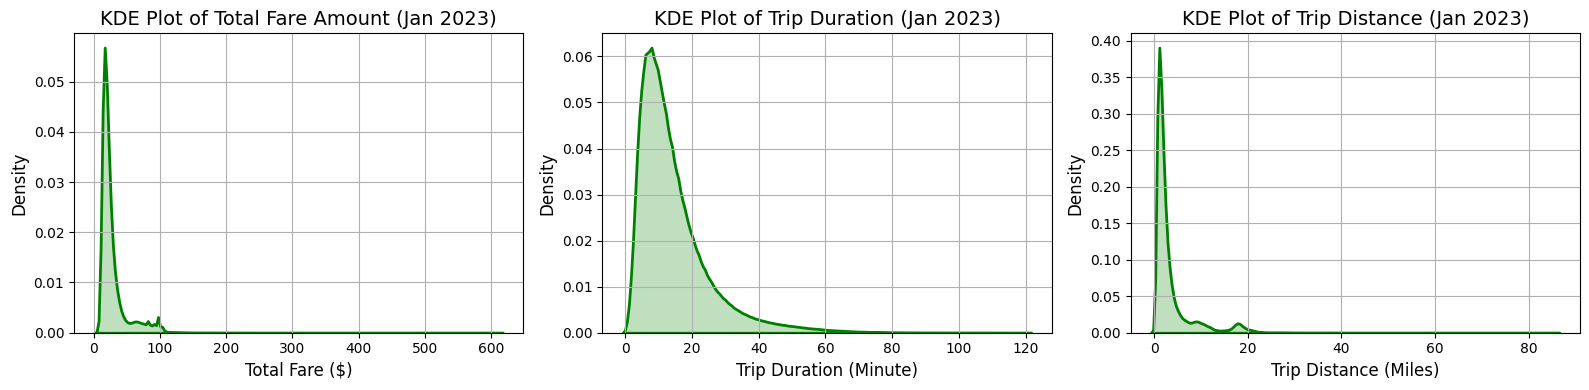

In [41]:

fig, axs = plt.subplots(1, 3, figsize=(16,4))

# Total Fare Amount KDE
sns.kdeplot(cleaned_taxi_trip_df['total_amount'], fill=True, color='green', linewidth=2, ax=axs[0])
axs[0].set_title("KDE Plot of Total Fare Amount (Jan 2023)", fontsize=14)
axs[0].set_xlabel("Total Fare ($)", fontsize=12)
axs[0].set_ylabel("Density", fontsize=12)
axs[0].grid(True)

# Trip Duration KDE
sns.kdeplot(cleaned_taxi_trip_df['trip_duration'], fill=True, color='green', linewidth=2, ax=axs[1])
axs[1].set_title("KDE Plot of Trip Duration (Jan 2023)", fontsize=14)
axs[1].set_xlabel("Trip Duration (Minute)", fontsize=12)
axs[1].set_ylabel("Density", fontsize=12)
axs[1].grid(True)

# Trip Distance KDE
sns.kdeplot(cleaned_taxi_trip_df['trip_distance'], fill=True, color='green', linewidth=2, ax=axs[2])
axs[2].set_title("KDE Plot of Trip Distance (Jan 2023)", fontsize=14)
axs[2].set_xlabel("Trip Distance (Miles)", fontsize=12)
axs[2].set_ylabel("Density", fontsize=12)
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [42]:
#  check skewness of data
print("Skewness of trip_duration:", cleaned_taxi_trip_df['trip_duration'].skew())
print("Skewness of total_amount:", cleaned_taxi_trip_df['total_amount'].skew())
print("Skewness of trip_distance:", cleaned_taxi_trip_df['trip_distance'].skew()) 

Skewness of trip_duration: 2.0789196445624842
Skewness of total_amount: 2.986498739416741
Skewness of trip_distance: 2.8797269482433636


#### Positive Skewness (right-skewed distribution):

- All three values are positive and greater than 1, meaning the distributions are highly right-skewed.
- The tail on the right side (higher values) is longer than the left side.
- Most data points are clustered on the left (lower values), with a few extreme high values pulling the mean above the median.

## <a id='peak'></a> Peak Demand Analysis (Revenue Maximization)
- Objective: Identify when and where the demand is highest to increase fleet deployment and reduce lost revenue.

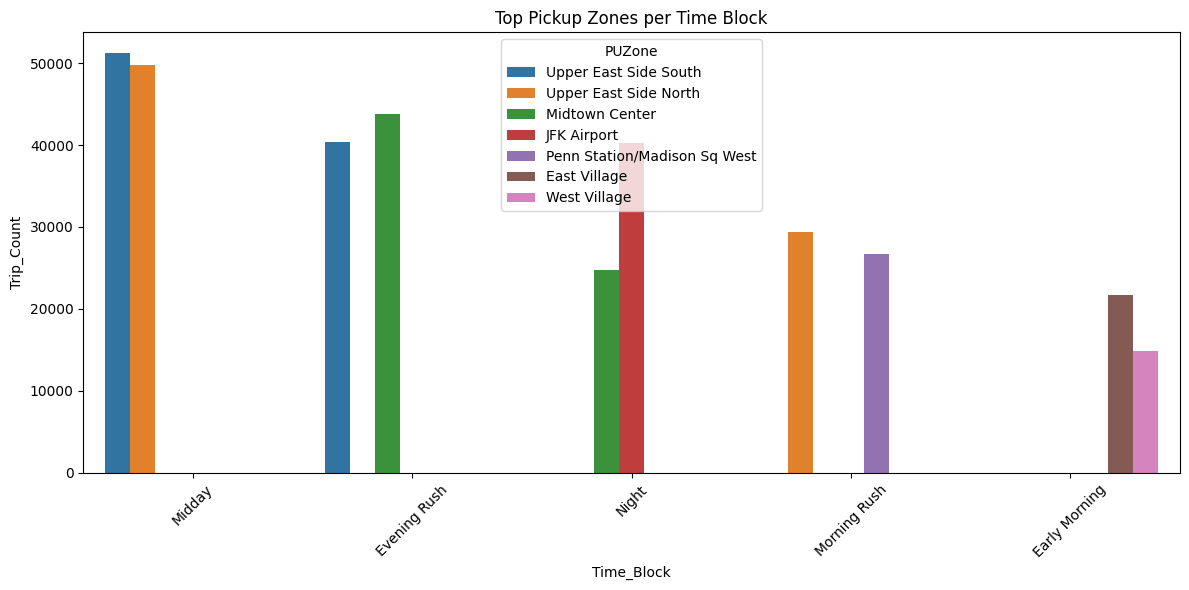

In [43]:
top_puzone = cleaned_taxi_trip_df.groupby(['Time_Block', 'PUZone']).size().reset_index(name='Trip_Count')
top2 = top_puzone.sort_values('Trip_Count', ascending=False).groupby('Time_Block').head(2)

plt.figure(figsize=(12, 6))
sns.barplot(data=top2, x='Time_Block', y='Trip_Count', hue='PUZone')
plt.title("Top Pickup Zones per Time Block")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
# Around Midday In Upper East side South and North of Manhattan has the highest demand of taxi
# Around Eveneing Rush , Midtown Center has the highest demand of taxi with upper east side south following it 
# Around Night JFK Airport has most demand of taxi  with MIdtown Center as well
# In the morning rush -  Upper east side north and penn station/madison sq west has most demand of taxi 
#  early in the morning /late night - east village and west village has most taxi demand 

'Upper East Side South/EAst village/west village - Manhanttan - yellow zone 
'Upper East Side NOrth - Manhanttan - yellow zone 
'Midtown Center - Manhanttan - yellow zone 
JKF Airport - Queens - Airports 
Penn Station/Madison Sq West - Manhanttan - yellow zone 

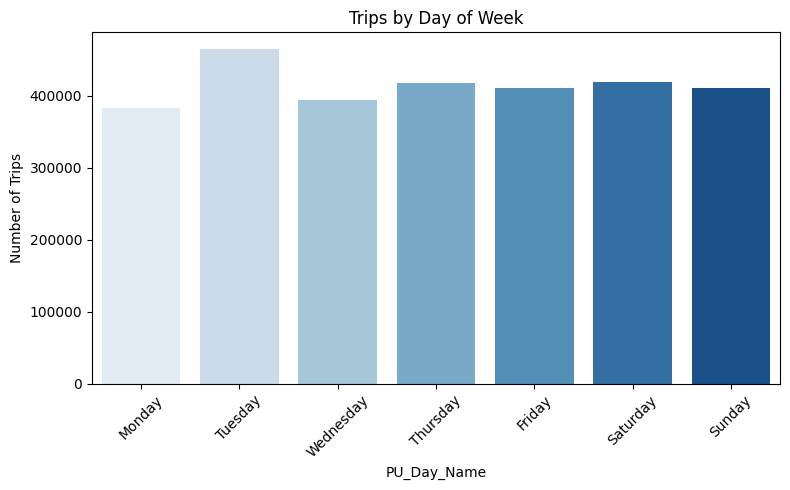

In [45]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daywise_trips = cleaned_taxi_trip_df['PU_Day_Name'].value_counts().reindex(day_order)

plt.figure(figsize=(8, 5))
sns.barplot(x=daywise_trips.index, y=daywise_trips.values, palette='Blues')
plt.title("Trips by Day of Week")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
# Tuesday is the busiest day of week 

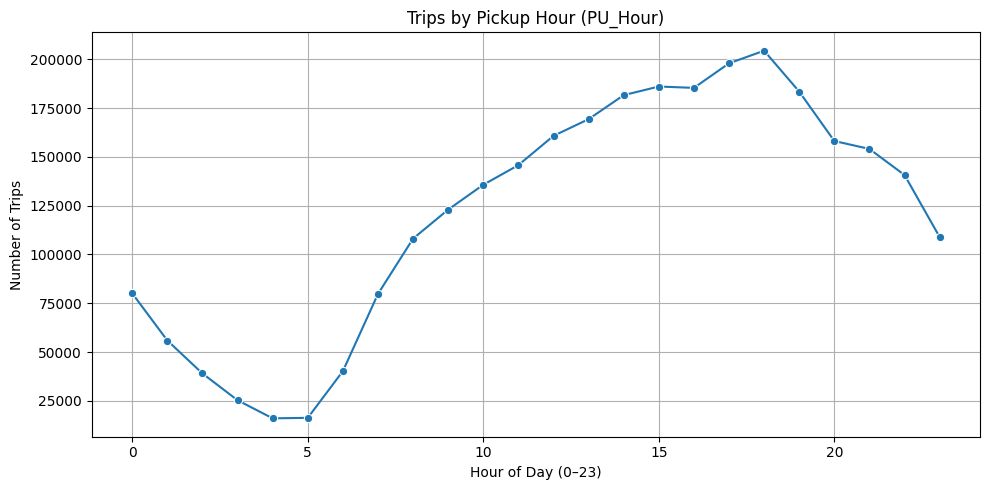

In [47]:

hourly_trips = cleaned_taxi_trip_df['PU_Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_trips.index, y=hourly_trips.values, marker='o')
plt.title("Trips by Pickup Hour (PU_Hour)")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
# most trips are courring  between 13 PM - 18PM , 
# late nigth/early morning has least demand of trips during night 

Text(0.5, 1.0, 'Hourly Demand Heatmap by Borough')

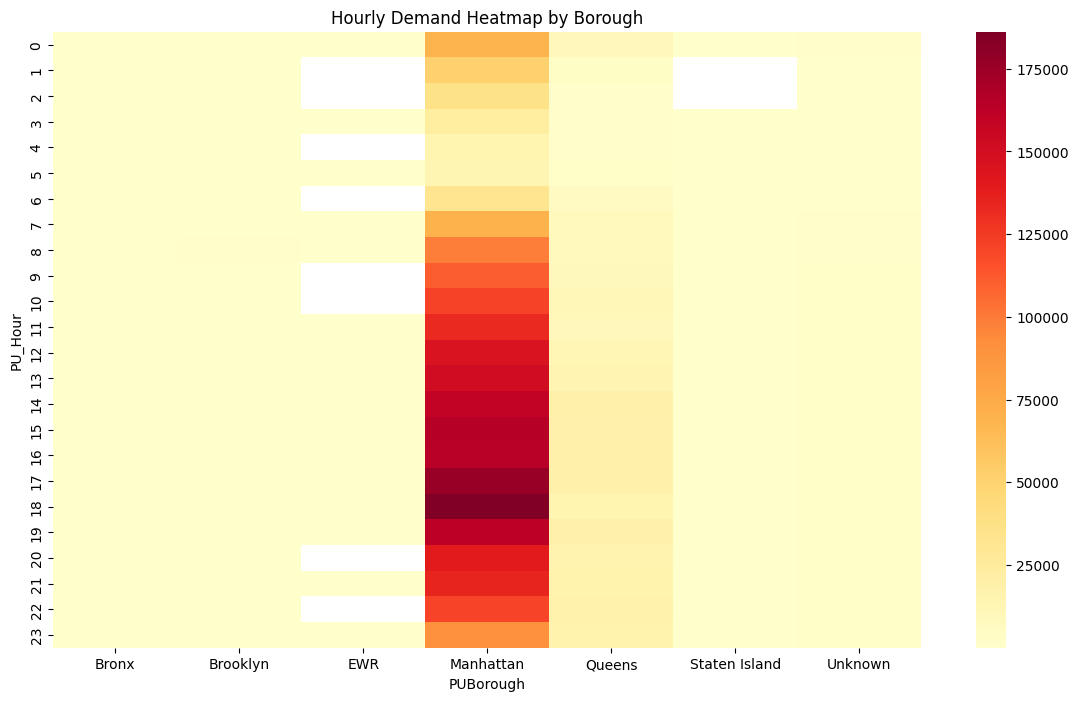

In [49]:
# Top pickup locations by time and borough
demand_heatmap = cleaned_taxi_trip_df.groupby(['PU_Hour', 'PUBorough'])['VendorID'].count().unstack()
plt.figure(figsize=(14,8))
sns.heatmap(demand_heatmap, cmap='YlOrRd')
plt.title('Hourly Demand Heatmap by Borough')

In [50]:
#  IN manhanntan , the demand peak during 16:00 PM to 19:00 PM 
# in other borough the demand is less or moderate compared to manhatten

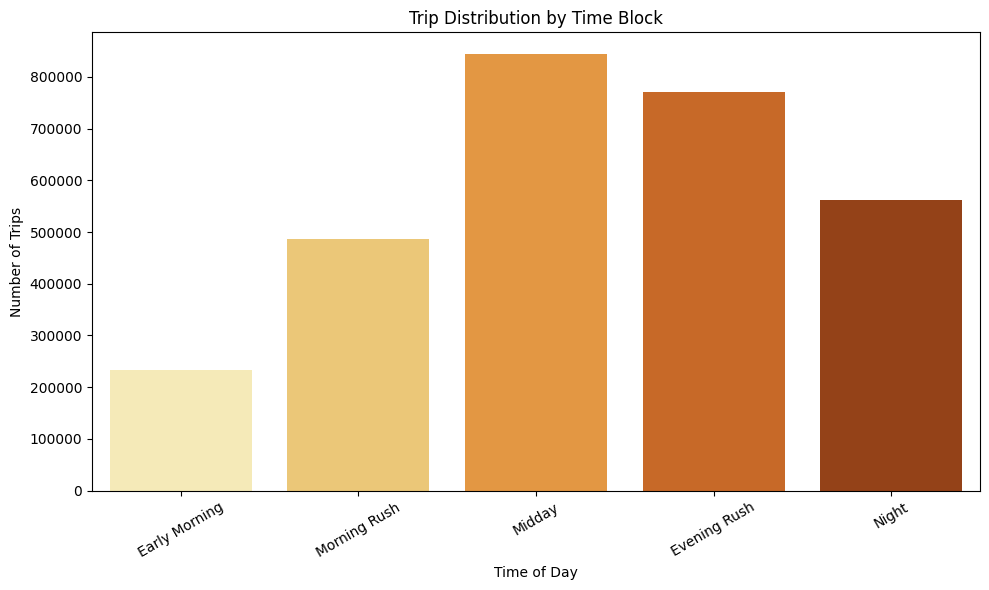

In [51]:
# Get counts sorted by number of trips (descending)
time_block_counts = cleaned_taxi_trip_df['Time_Block'].value_counts().reset_index()
time_block_counts.columns = ['Time_Block', 'Trip_Count']

# Define the time order explicitly
order = ['Early Morning', 'Morning Rush', 'Midday', 'Evening Rush', 'Night']

# Convert Time_Block to categorical with specified order for sorting in plot
time_block_counts['Time_Block'] = pd.Categorical(time_block_counts['Time_Block'], categories=order, ordered=True)
time_block_counts = time_block_counts.sort_values('Time_Block')
plt.figure(figsize=(10, 6))
sns.barplot(data=time_block_counts, x='Time_Block', y='Trip_Count', palette='YlOrBr')

plt.title('Trip Distribution by Time Block')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [52]:
#  Midday is the busines time of the day following with evening Rush 

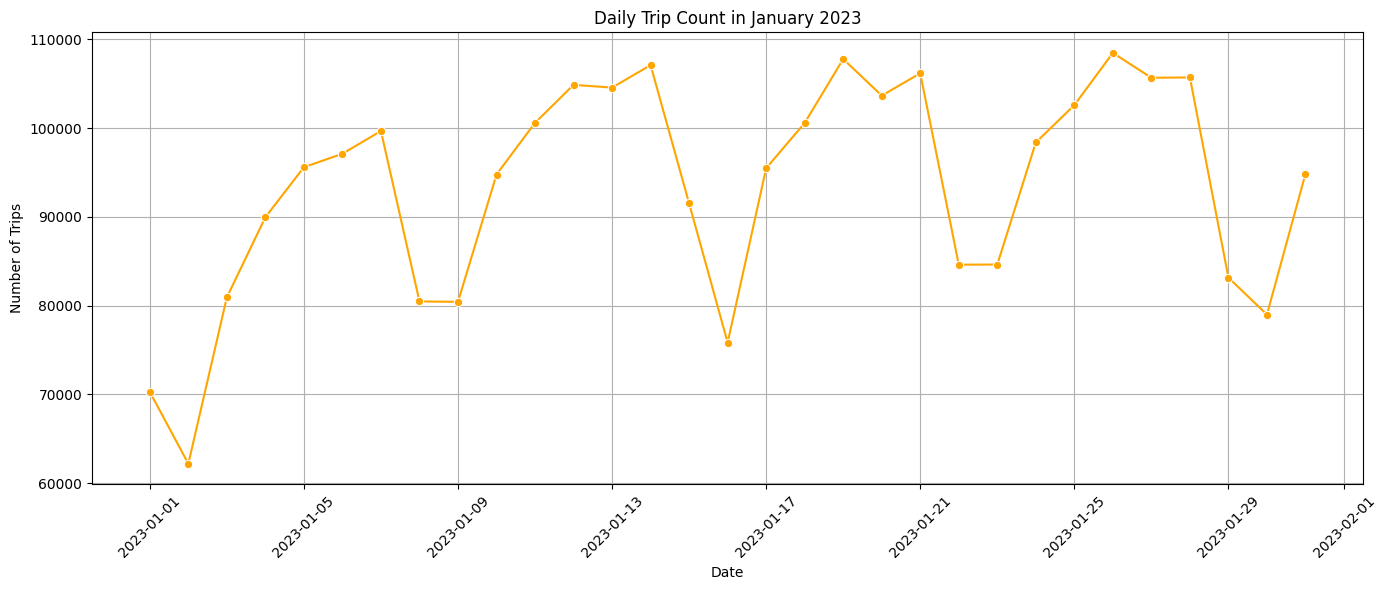

In [53]:
daily_trip = cleaned_taxi_trip_df.groupby(by='PU_Date').size().reset_index(name='Trip_Count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_trip, x='PU_Date', y='Trip_Count', marker='o', color='orange')
plt.title('Daily Trip Count in January 2023')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# on the start of the month , the demand is very less 
# there is a parttern of demand increase during weekday and falling down during the weekends 

## <a id='trip'></a> Trip Duration & Distance Patterns
- Objective: Understand average trip times/distances by time, day, and zone to optimize operations.

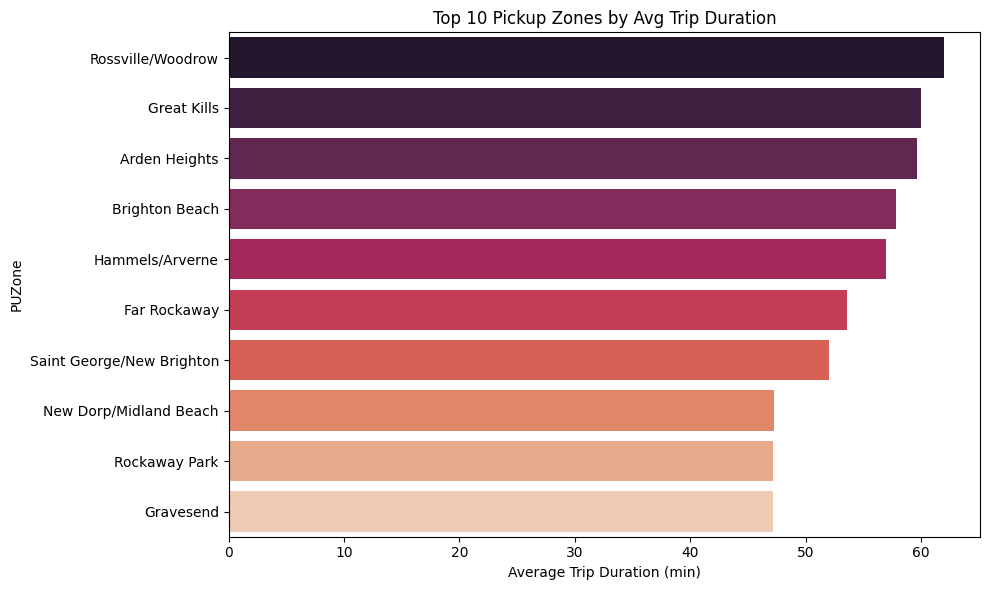

In [55]:
zone_stats = cleaned_taxi_trip_df.groupby('PUZone')['trip_duration'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=zone_stats.values, y=zone_stats.index, palette='rocket')
plt.title('Top 10 Pickup Zones by Avg Trip Duration')
plt.xlabel('Average Trip Duration (min)')
plt.tight_layout()
plt.show()


In [56]:
# no of trips might be less , due to taxis are occupied for longer during in the above areas like rossville/woodrow, great kills and arden heights,brighton beach
# 

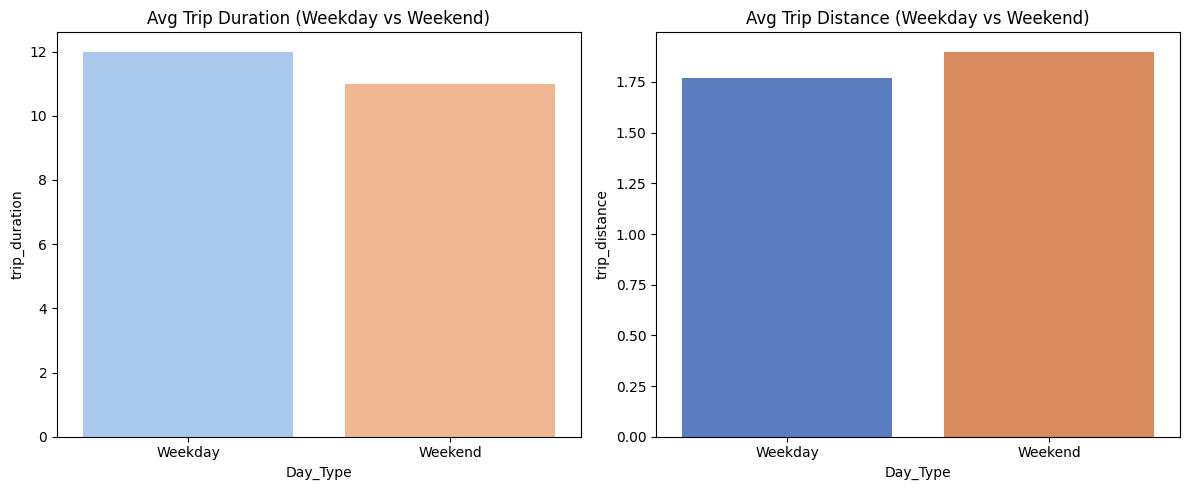

In [57]:

weektype_stats = cleaned_taxi_trip_df.groupby('Day_Type')[['trip_duration', 'trip_distance']].median().reset_index()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data=weektype_stats, x='Day_Type', y='trip_duration', ax=axes[0], palette='pastel')
axes[0].set_title('Avg Trip Duration (Weekday vs Weekend)')

sns.barplot(data=weektype_stats, x='Day_Type', y='trip_distance', ax=axes[1], palette='muted')
axes[1].set_title('Avg Trip Distance (Weekday vs Weekend)')

plt.tight_layout()
plt.show()


In [58]:
# On weekday, the trip duration is highter than weekend 
# but the trip distance is longer on weekend compared to weekday 

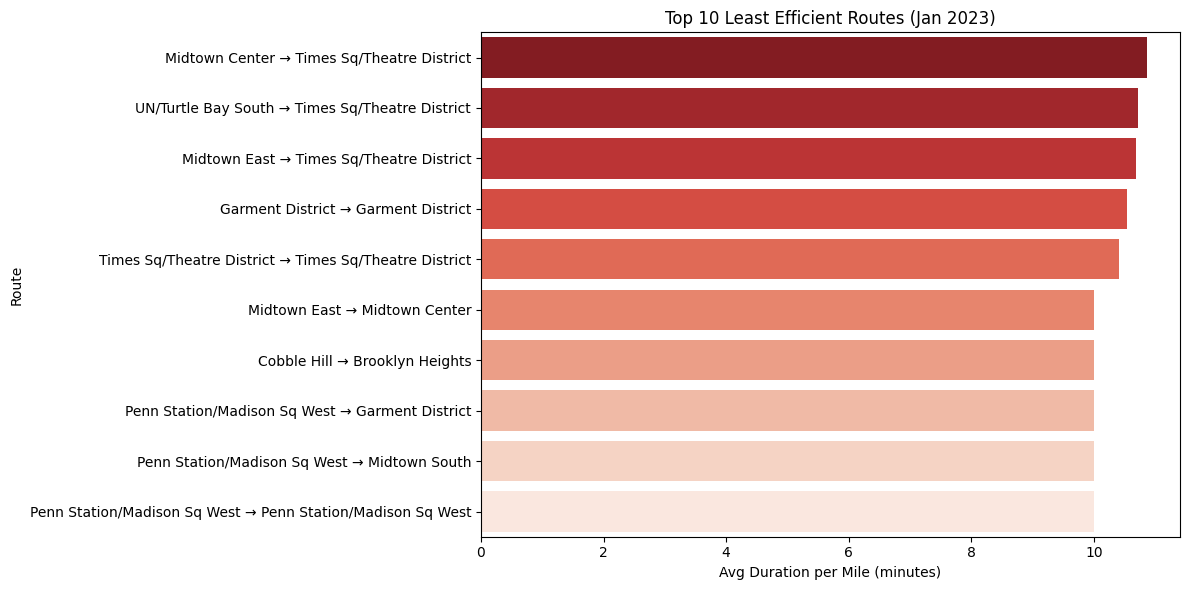

In [59]:
# Which routes (from PULocation → DOLocation) take more time than expected given their trip distance?
#  Create a Route Key (PUZone → DOZone or Borough → Borough)
cleaned_taxi_trip_df['Route'] = cleaned_taxi_trip_df['PUZone'] + " → " + cleaned_taxi_trip_df['DOZone']
# cleaned_taxi_trip_df['Route'] = cleaned_taxi_trip_df['PUBorough'] + " → " + cleaned_taxi_trip_df['DOBorough']

# compute efficiency metric 
cleaned_taxi_trip_df['duration_per_mile'] = cleaned_taxi_trip_df['trip_duration'] / cleaned_taxi_trip_df['trip_distance']
# group by route and compute aggregates
route_efficiency = cleaned_taxi_trip_df.groupby('Route').agg({
    'trip_duration': 'median',
    'trip_distance': 'median',
    'duration_per_mile': 'median',
    'VendorID': 'count'  # Use this to filter rare routes
}).rename(columns={'VendorID': 'trip_count'}).reset_index()

# To remove outliers or very rare trips
route_efficiency = route_efficiency[route_efficiency['trip_count'] >= 50]
inefficient_routes = route_efficiency.sort_values(by='duration_per_mile', ascending=False)
top10 = inefficient_routes.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='duration_per_mile', y='Route', palette='Reds_r')
plt.xlabel("Avg Duration per Mile (minutes)")
plt.title("Top 10 Least Efficient Routes (Jan 2023)")
plt.tight_layout()
plt.show()


In [60]:
#  from midtown center/UN/Midtown east/ to time sq/theatre district taking  more time to reach than usual 
# Garment District is also one of them 

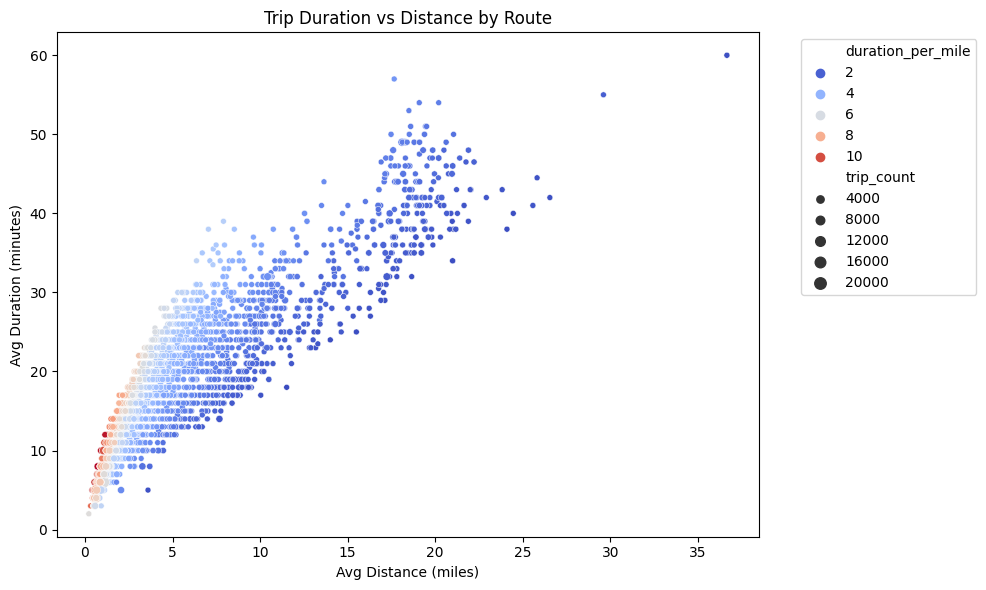

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=route_efficiency, x='trip_distance', y='trip_duration', size='trip_count', hue='duration_per_mile', palette='coolwarm')
plt.title("Trip Duration vs Distance by Route")
plt.xlabel("Avg Distance (miles)")
plt.ylabel("Avg Duration (minutes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [62]:
# short trips has less efficeint in term of duration per mile , taking more time average 

## <a id='tip'></a> Revenue Leakage & No-Tip Cases
- Objective: Identify loss of income from no/low tips or zero fare_amount.


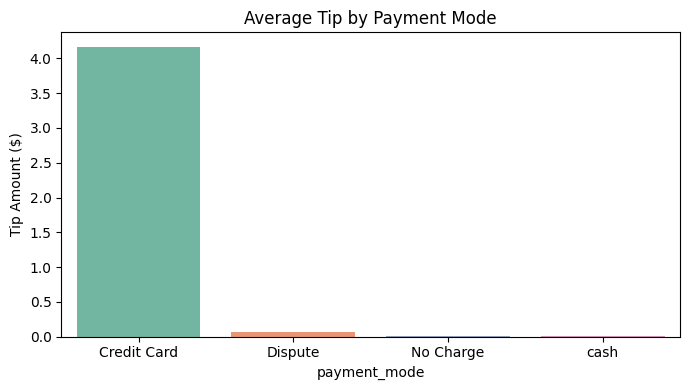

In [63]:
paymode_tip = cleaned_taxi_trip_df.groupby('payment_mode')['tip_amount'].mean().reset_index()

plt.figure(figsize=(7, 4))
sns.barplot(data=paymode_tip, x='payment_mode', y='tip_amount', palette='Set2')
plt.title("Average Tip by Payment Mode")
plt.ylabel("Tip Amount ($)")
plt.tight_layout()
plt.show()


In [64]:
#  Most tip is given my credit card payment mode customer 
#  Cash has neglegible tip ,

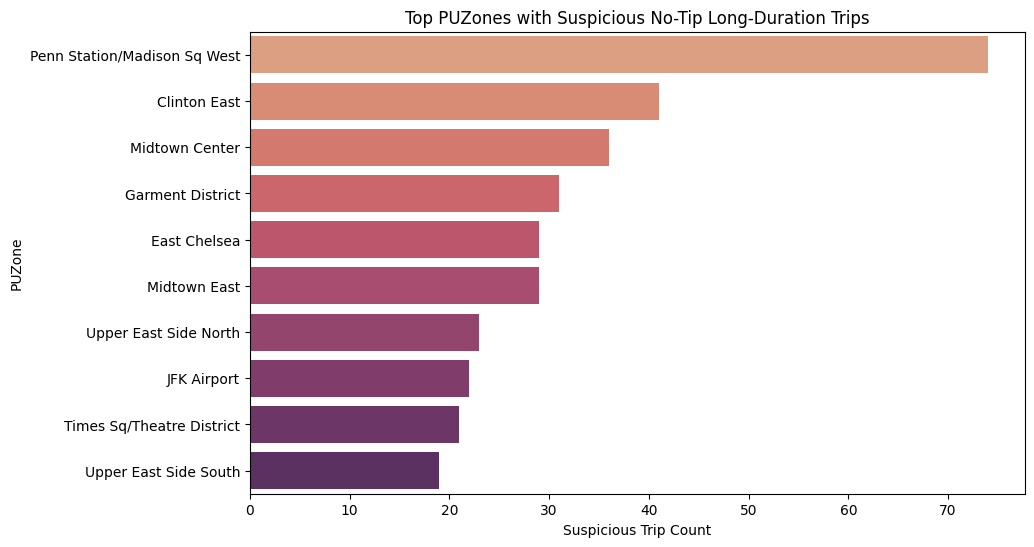

In [65]:
# Create suspicious flag
cleaned_taxi_trip_df['suspicious_no_tip'] = ((cleaned_taxi_trip_df['tip_amount'] == 0) &
                           (cleaned_taxi_trip_df['trip_distance'] < 1.0) & 
                           (cleaned_taxi_trip_df['trip_duration'] > 20))  # e.g., 15 mins+

# View suspicious cases
suspicious_cases = cleaned_taxi_trip_df[cleaned_taxi_trip_df['suspicious_no_tip']][['PUZone', 'trip_distance', 'trip_duration', 'tip_amount']]

# Count by PUZone
zone_suspicious = suspicious_cases['PUZone'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=zone_suspicious.values, y=zone_suspicious.index, palette='flare')
plt.title('Top PUZones with Suspicious No-Tip Long-Duration Trips')
plt.xlabel('Suspicious Trip Count')
plt.show()


In [66]:
# PU from penn station/ madison sq  west  and clinton east ,midtown center and garment district ,east chelsea  has longer trip where tip was not given 


## <a id='fare'></a> Fare vs Total Amount Breakdown
- Objective: Understand what contributes to the total fare.

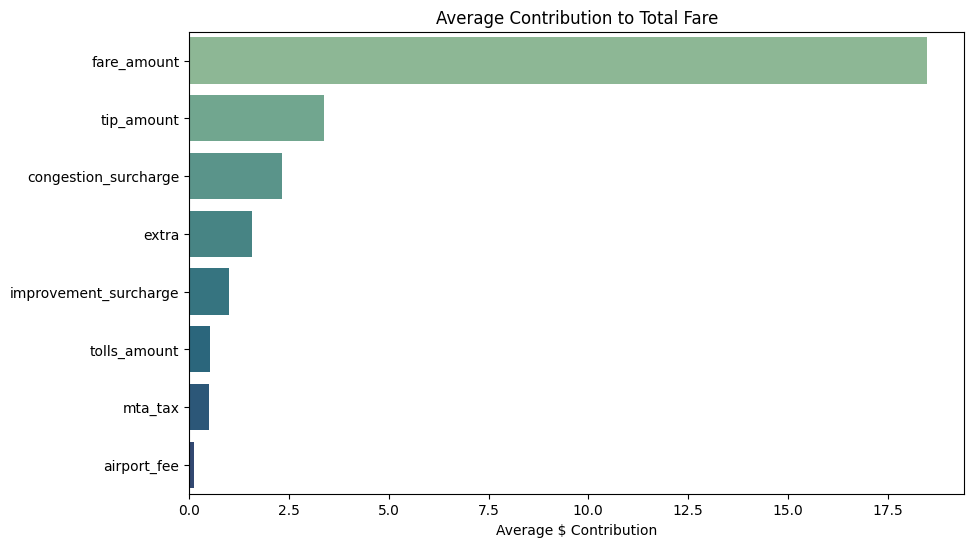

In [67]:
# Average contribution of each component
components = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
              'tolls_amount', 'improvement_surcharge', 
              'congestion_surcharge', 'airport_fee']

avg_contribution = cleaned_taxi_trip_df[components].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_contribution.values, y=avg_contribution.index, palette='crest')
plt.title('Average Contribution to Total Fare')
plt.xlabel('Average $ Contribution')
plt.show()


In [68]:
# Fare amount , tip amount and congestino surcharge , contributing most to the revunue

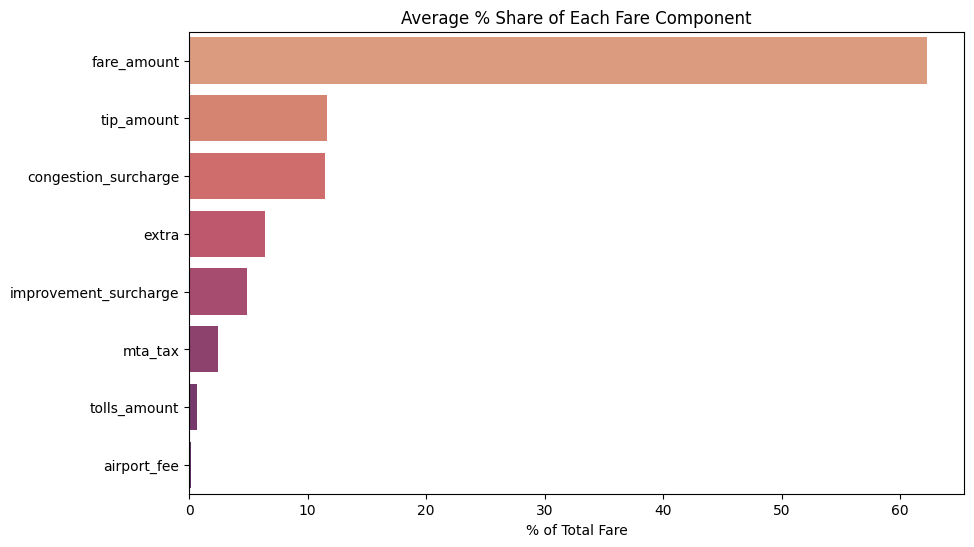

In [69]:
# Calculate % share of total_amount
for col in components:
    cleaned_taxi_trip_df[f'{col}_pct'] = cleaned_taxi_trip_df[col] / cleaned_taxi_trip_df['total_amount']

# Plot average share
avg_pct = cleaned_taxi_trip_df[[f'{col}_pct' for col in components]].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_pct.values * 100, y=[c.replace('_pct', '') for c in avg_pct.index], palette='flare')
plt.title('Average % Share of Each Fare Component')
plt.xlabel('% of Total Fare')
plt.show()


In [70]:
# 80-85% of reveue is from the fare amount+tip+congestion surcharge 

## <a id='payment'></a>Payment Method Trends
Objective: Analyze customer preference by time and zone.

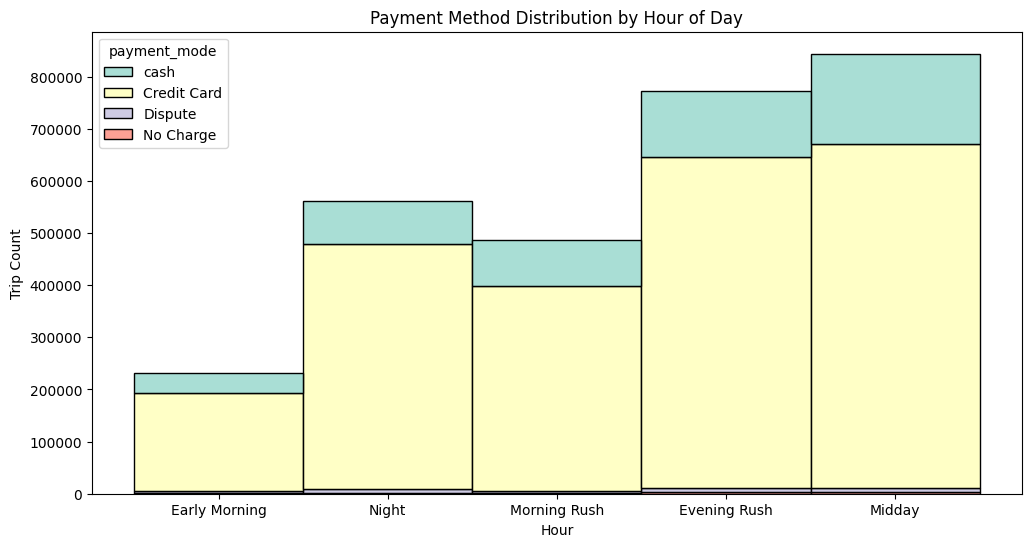

In [71]:

plt.figure(figsize=(12,6))
sns.histplot(data=cleaned_taxi_trip_df, x='Time_Block', hue='payment_mode', multiple='stack', bins=24, palette='Set3')
plt.title('Payment Method Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Trip Count')
plt.show()


In [72]:
#  regardless of any time of day , most customer are prefering the credit card for payment, espectilly in the morning and during night 

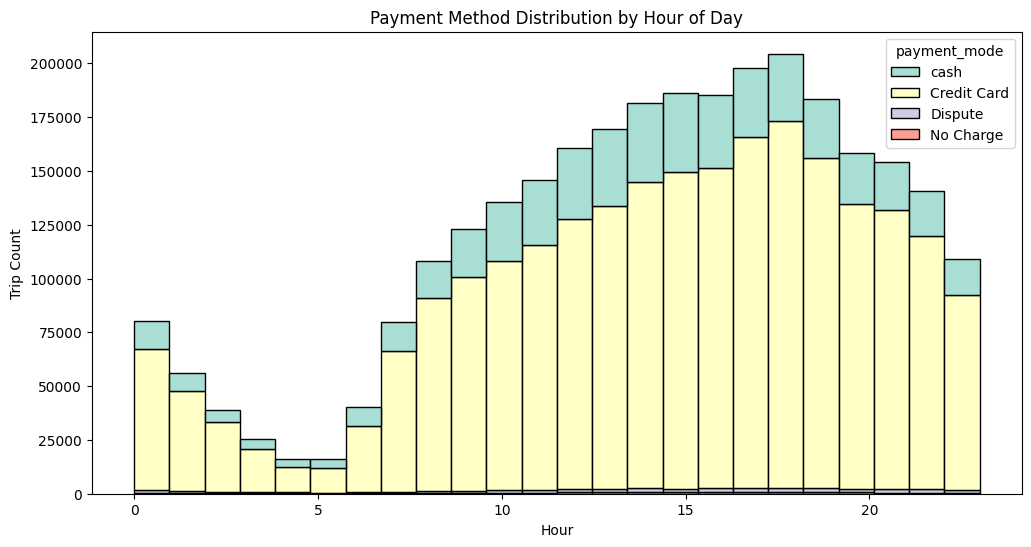

In [73]:

plt.figure(figsize=(12,6))
sns.histplot(data=cleaned_taxi_trip_df, x='PU_Hour', hue='payment_mode', multiple='stack', bins=24, palette='Set3')
plt.title('Payment Method Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Trip Count')
plt.show()


In [74]:
# same treand is shown in hourly trend too 

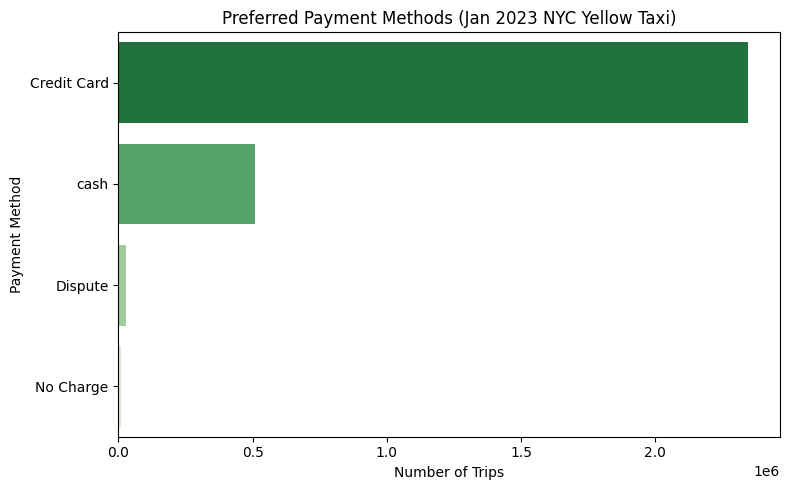

In [75]:
payment_counts = cleaned_taxi_trip_df['payment_mode'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Trip Count']
plt.figure(figsize=(8, 5))
sns.barplot(data=payment_counts, x='Trip Count', y='Payment Method', palette='Greens_r')
plt.title("Preferred Payment Methods (Jan 2023 NYC Yellow Taxi)")
plt.xlabel("Number of Trips")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

In [76]:
# Credit card is the most prefered payment tpe 

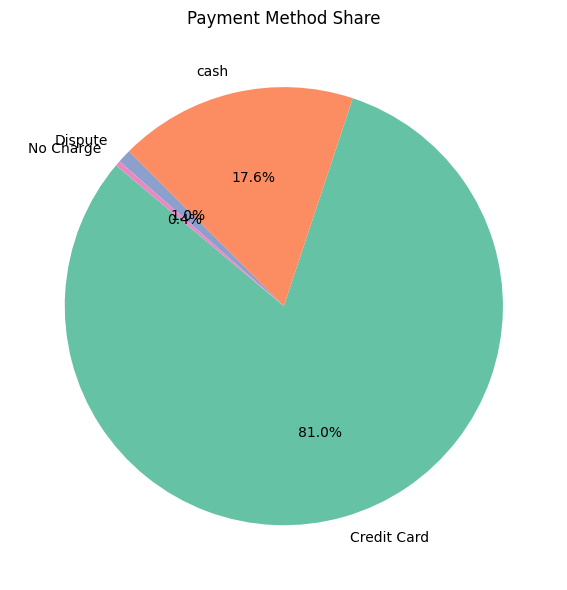

In [77]:
plt.figure(figsize=(6, 6))
plt.pie(payment_counts['Trip Count'], labels=payment_counts['Payment Method'], 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Payment Method Share")
plt.tight_layout()
plt.show()

## <a id='airport'></a> Airport Trip Analysis
- Objective: Quantify impact and revenue from airport trips.

In [78]:
    airports = ['JFK', 'LaGuardia', 'Newark']
    airport_trips = cleaned_taxi_trip_df[
        cleaned_taxi_trip_df['PUZone'].str.contains('|'.join(airports), case=False, na=False) |
        cleaned_taxi_trip_df['DOZone'].str.contains('|'.join(airports), case=False, na=False)
    ].copy()

In [79]:
airports = ['JFK', 'LaGuardia', 'Newark']
DO_airport_trips = cleaned_taxi_trip_df[
        cleaned_taxi_trip_df['DOZone'].str.contains('|'.join(airports), case=False, na=False) 
    ].copy()

In [80]:
# Get top 5 pickup zones for airport drop-offs
top_zones = (
    DO_airport_trips['PUZone']
    .value_counts()
    .head(5)
    .index
)

# Filter only those trips from top pickup zones
df_top_airport_trips = DO_airport_trips[DO_airport_trips['PUZone'].isin(top_zones)]

# Group by zone and time block
zone_timeblock = (
    df_top_airport_trips
    .groupby(['PUZone', 'Time_Block'])
    .size()
    .reset_index(name='trip_count')
)


In [81]:
# airport_time_zone = airport_trips.groupby(['PU_Hour', 'PUZone']).size().reset_index(name='trip_count')

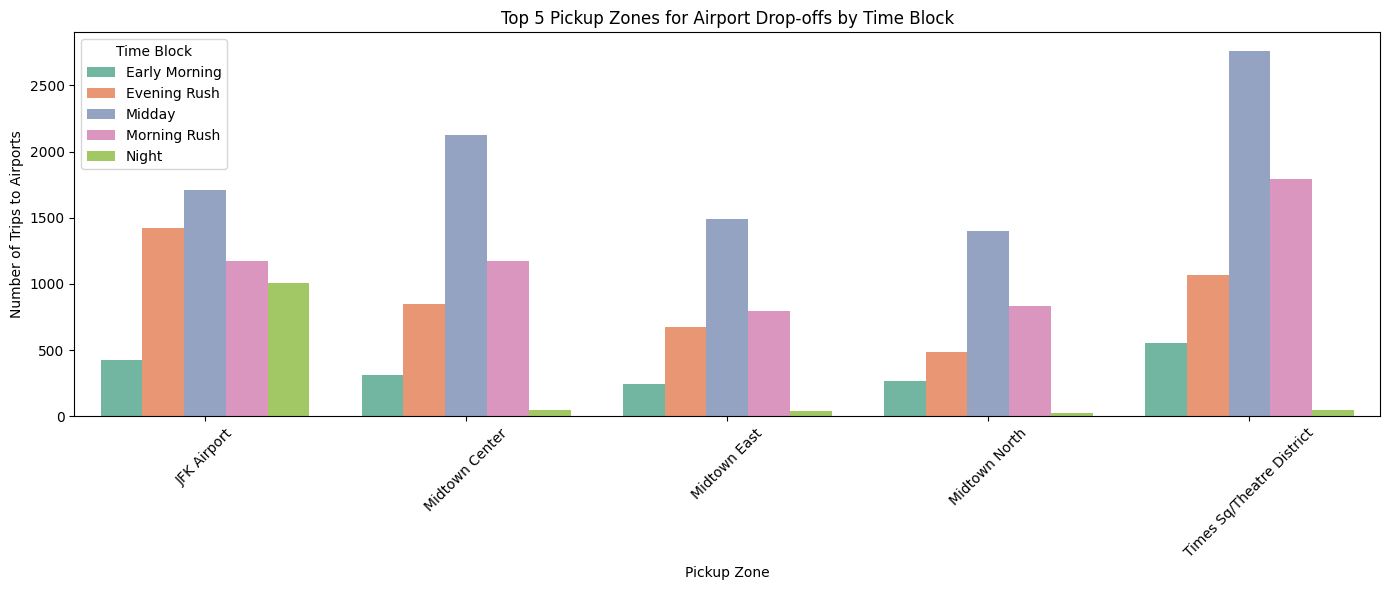

In [82]:

plt.figure(figsize=(14, 6))
sns.barplot(data=zone_timeblock, x='PUZone', y='trip_count', hue='Time_Block', palette='Set2')
plt.title("Top 5 Pickup Zones for Airport Drop-offs by Time Block")
plt.xlabel("Pickup Zone")
plt.ylabel("Number of Trips to Airports")
plt.xticks(rotation=45)
plt.legend(title='Time Block')
plt.tight_layout()
plt.show()


In [83]:
#  Most Airport trip are occuring during midday and morning rush 
# Time sq/theatre District , midtown is the hotspot for airport trips 
# JFk Aiport has demand during midday and evening rush 
# very less trips are during night and early morning/late night except for JFK airport where there is good demand during night 

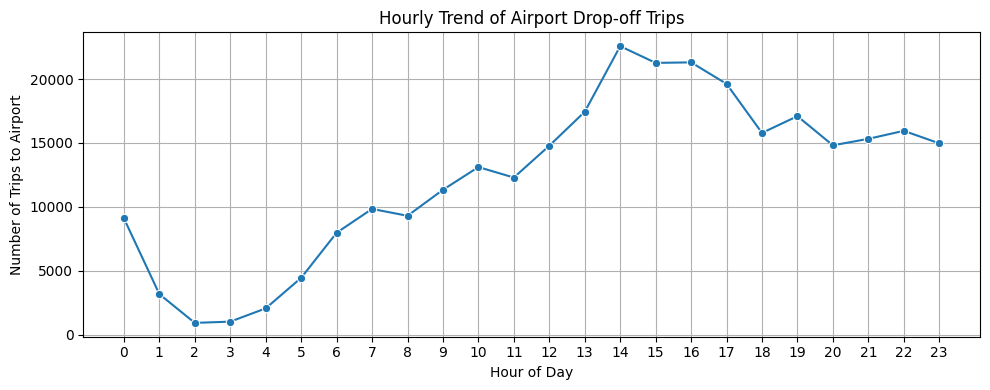

In [84]:
hourly_airport = airport_trips['PU_Hour'].value_counts().sort_index().reset_index()
hourly_airport.columns = ['Hour', 'trip_count']

plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly_airport, x='Hour', y='trip_count', marker='o')
plt.title("Hourly Trend of Airport Drop-off Trips")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips to Airport")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


In [85]:
#  from 1PM to 4pm , Airport trip demand is high 
# very less between 19:00 to 4:00 in the early morning 

In [86]:
# airport_zones = ["JFK Airport", "LaGuardia Airport", "Newark Airport"]
# df_airport = cleaned_taxi_trip_df[
#     (cleaned_taxi_trip_df['PUZone'].isin(airport_zones)) | 
#     (cleaned_taxi_trip_df['DOZone'].isin(airport_zones))
# ]
airport_by_hour = airport_trips.groupby('PU_Hour').size().reset_index(name='trip_count')
airport_by_block = airport_trips.groupby('Time_Block').size().reset_index(name='trip_count')

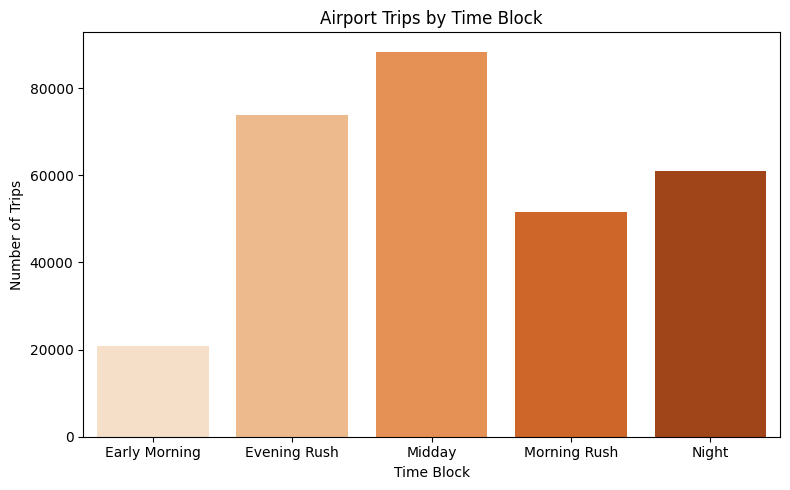

In [87]:
plt.figure(figsize=(8, 5))
sns.barplot(data=airport_by_block, x='Time_Block', y='trip_count', palette='Oranges')
plt.title("Airport Trips by Time Block")
plt.xlabel("Time Block")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

In [88]:
#  midday is busiest time of day for airport trips 


## <a id='borough'></a>  Borough-Wise Revenue and Trip Density
- Objective: Identify underserved or over-served boroughs

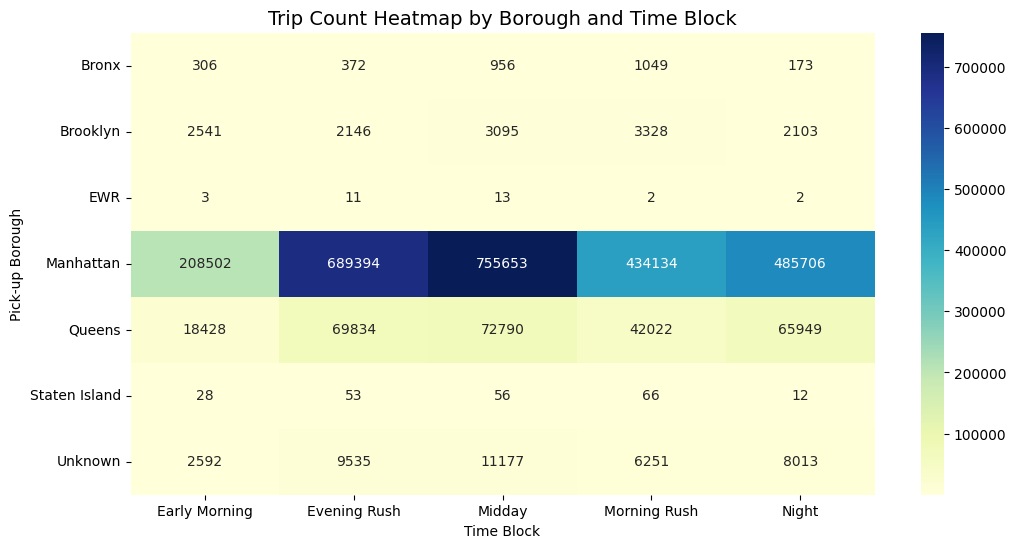

In [89]:
trip_density = (
    cleaned_taxi_trip_df
    .groupby(['PUBorough', 'Time_Block'])
    .size()
    .reset_index(name='trip_count')
)
# Pivot the data
pivot_table = trip_density.pivot(index='PUBorough', columns='Time_Block', values='trip_count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')

plt.title("Trip Count Heatmap by Borough and Time Block", fontsize=14)
plt.xlabel("Time Block")
plt.ylabel("Pick-up Borough")
plt.show()


In [90]:
#  Manhattan in the busiest borough for taxi trips
# Midday is the busiest time of day in manhattan 
# thrre is steady amount of demand in Mahnattan thorought a day 
#  while in other case only in Queens the is good except early morning/ late night and morning


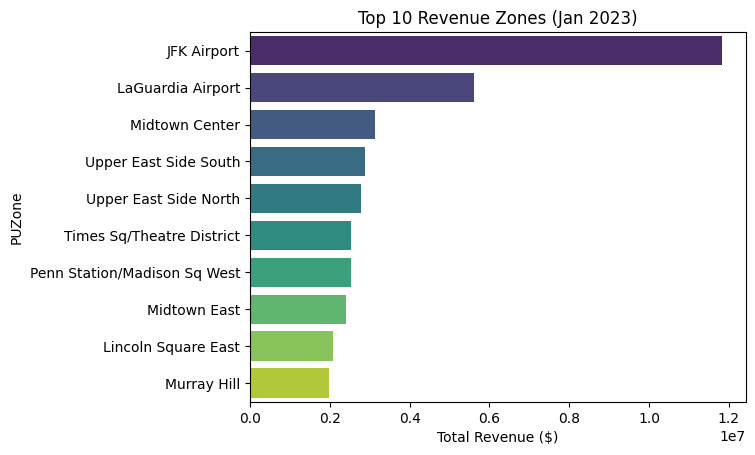

In [91]:
top_zones = cleaned_taxi_trip_df.groupby('PUZone')['total_amount'].sum().nlargest(10)
sns.barplot(y=top_zones.index, x=top_zones.values, palette='viridis')
plt.title('Top 10 Revenue Zones (Jan 2023)')
plt.xlabel('Total Revenue ($)')
plt.show()

In [92]:
#  the most revenue is genereted from JFT and Laguardia aiport 

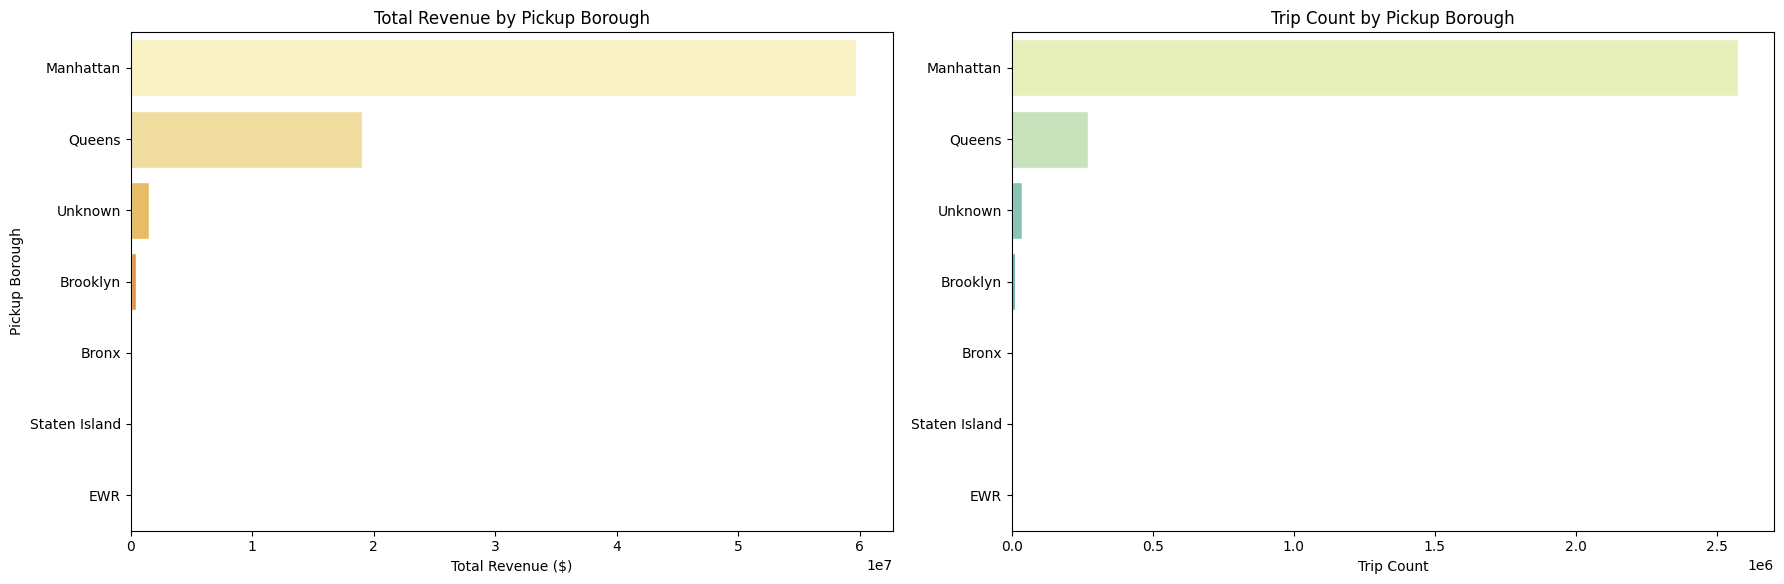

In [93]:
# Aggregate revenue and trip count
borough_agg = cleaned_taxi_trip_df.groupby('PUBorough').agg({
    'total_amount': 'sum',
    'VendorID': 'count'
}).reset_index().rename(columns={'VendorID': 'trip_count'})

# Sort by revenue for consistent order
borough_agg = borough_agg.sort_values(by='total_amount', ascending=False)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.set(style="whitegrid")

# Total Revenue Plot
sns.barplot(data=borough_agg, x='total_amount', y='PUBorough', ax=axes[0], palette='YlOrBr')
axes[0].set_title('Total Revenue by Pickup Borough')
axes[0].set_xlabel('Total Revenue ($)')
axes[0].set_ylabel('Pickup Borough')

# Trip Count Plot
sns.barplot(data=borough_agg, x='trip_count', y='PUBorough', ax=axes[1], palette='YlGnBu')
axes[1].set_title('Trip Count by Pickup Borough')
axes[1].set_xlabel('Trip Count')
axes[1].set_ylabel('')  # Remove y-axis label to avoid repetition

plt.tight_layout()
plt.show()

In [94]:
# most trips are within manhattan

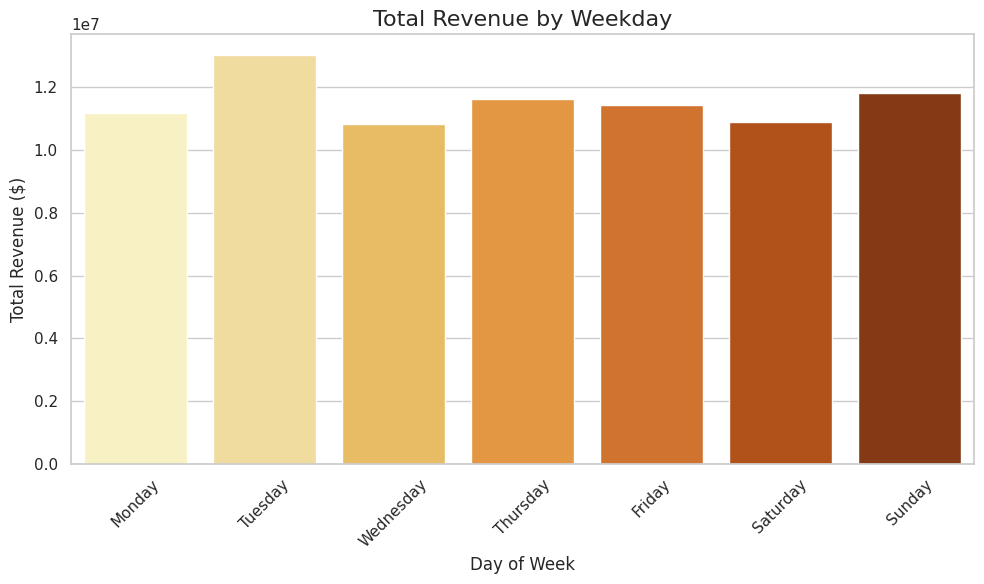

In [95]:
weekday_revenue = cleaned_taxi_trip_df.groupby(by='PU_Day_Name')['total_amount'].sum().sort_values(ascending=False).reset_index(name='total_revenue')
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_revenue['PU_Day_Name'] = pd.Categorical(weekday_revenue['PU_Day_Name'], categories=ordered_days, ordered=True)
weekday_revenue = weekday_revenue.sort_values('PU_Day_Name')

plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_revenue, x='PU_Day_Name', y='total_revenue', palette='YlOrBr')

plt.title('Total Revenue by Weekday', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [96]:
#  most revenue is genered on Tuesday with Sunday following coz of longer trips 

## <a id='toll'></a> Congestion Surcharge & Toll Impact 
Objective: Understand how congestion charges affect total fare and trip behavior.

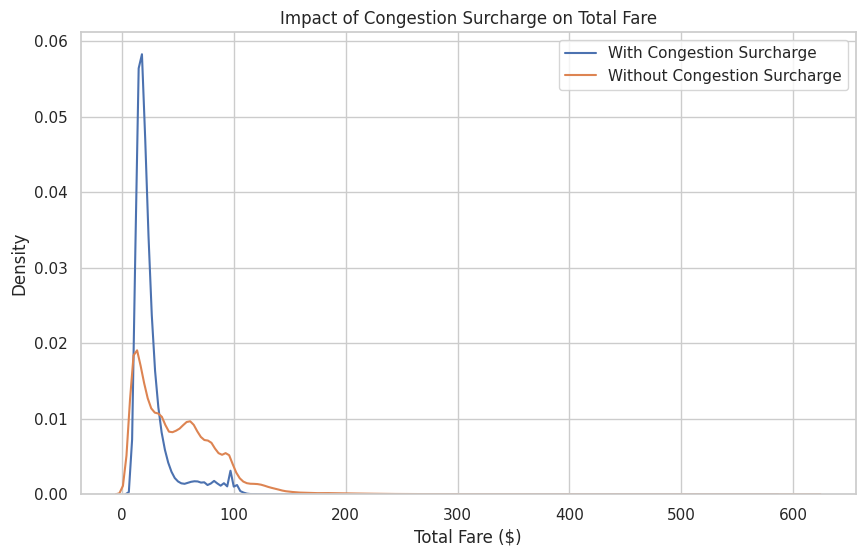

In [97]:
# Compare total_amount with and without congestion surcharge
has_congestion = cleaned_taxi_trip_df[cleaned_taxi_trip_df['congestion_surcharge'] > 0]['total_amount']
no_congestion = cleaned_taxi_trip_df[cleaned_taxi_trip_df['congestion_surcharge'] == 0]['total_amount']

plt.figure(figsize=(10,6))
sns.kdeplot(has_congestion, label='With Congestion Surcharge')
sns.kdeplot(no_congestion, label='Without Congestion Surcharge')
plt.title('Impact of Congestion Surcharge on Total Fare')
plt.xlabel('Total Fare ($)')
plt.legend()
plt.show()

In [98]:
# most trip are occured on lower end of fare range , even with congestion surcharge added, the demand is not decreased , but for high fare
# there are very few longer or expenstive trips with congestion surcharge , 
#  wider varitety of longer trips without the congestion surcharge 

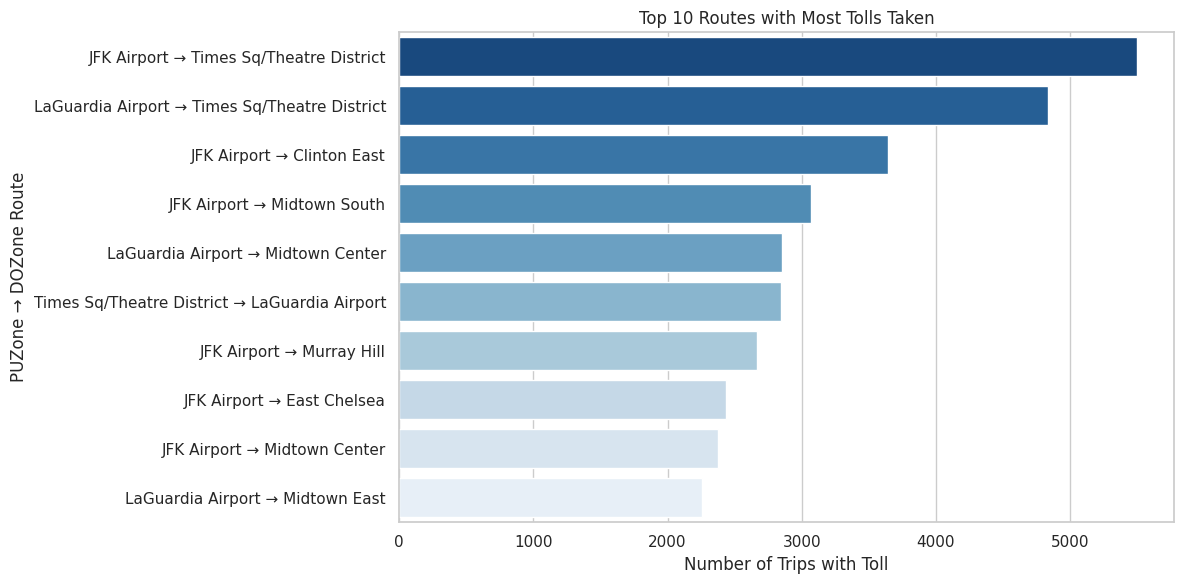

In [99]:
# Create a Tolls Flag
cleaned_taxi_trip_df['toll_taken'] = cleaned_taxi_trip_df['tolls_amount'] > 0
# Group by Route and Count Tolls
toll_counts = cleaned_taxi_trip_df.groupby('Route')['toll_taken'].sum().reset_index()
toll_counts = toll_counts.sort_values(by='toll_taken', ascending=False)

top_toll_routes = toll_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_toll_routes, x='toll_taken', y='Route', palette='Blues_r')
plt.xlabel("Number of Trips with Toll")
plt.ylabel("PUZone → DOZone Route")
plt.title("Top 10 Routes with Most Tolls Taken")
plt.tight_layout()
plt.show() 

In [100]:
# PU Airport trip are primary contributor to toll occuring trips 
# Laguuardia airport - time sq/theatre district toll taken is taken in higher amount , than in reverse trip  , One way bias 
# most tolls are occuring in central mahnahttan 
# DO destitination like Time sq. , clinton east, midtown , are top toll-heavy routes

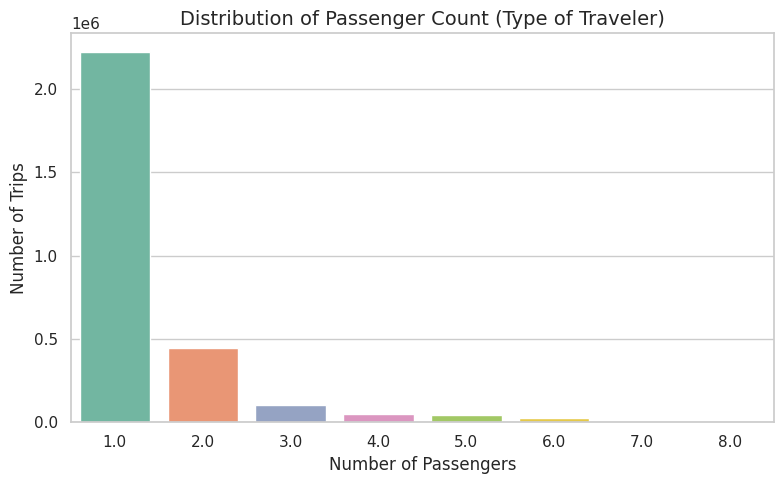

In [101]:

# Count of trips by passenger count
plt.figure(figsize=(8, 5))
sns.countplot(data=cleaned_taxi_trip_df, x='passenger_count', palette='Set2')

plt.title('Distribution of Passenger Count (Type of Traveler)', fontsize=14)
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() 

In [102]:
#  most passenger travel solo 

# <a id=insights></a> 
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h1 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  🔍4. Insights
</h1>

# Final Insights
## Data Quality Concerns:
    - Vendor 2 (Creative Mobile Technologies) contributed ~66% of data with missing or invalid entries (e.g., passenger count = 0, payment type = 0).

    - Several extreme values (e.g., trip distance over 258,000 miles) indicate entry errors needing cleansing.

## Passenger Behavior:

    - 81% of trips were paid via credit card, showing high trust and digital payment preference.

    - Most passengers travel solo or in pairs. Very few trips involve more than 4 people.

## Time & Location Patterns:

    - Midday (1 PM–4 PM) and Evening (4 PM–7 PM) are peak hours.

    - Tuesday is the busiest day, with Sunday having longer average trips.

    - Manhattan dominates both pickup and drop-off locations (~89%).

    - High-demand hotspots: Midtown Center, JFK Airport, Upper East Side, and Penn Station.

## Airport Trip Trends:

    - Most airport trips are during midday and rush hours.

    - A noticeable one-way fare bias (e.g., Laguardia to Times Sq costs more than return trip).

## Trip Metrics:

    - Average duration: 14.5 min

    - Average distance: 3.4 miles

    - Average fare per mile: $8.15

    - Highly skewed distributions indicate the presence of long and costly trips affecting averages.

## Revenue Drivers:

    - Majority of revenue (80–85%) comes from:
    Fare Amount + Tips + Congestion Surcharge

    - Most revenue is generated within Manhattan and from airport zones (especially JFK).

## Efficiency Gaps:

    - Short trips (under a mile) often take more time per mile, indicating inefficiency.

    - Cash trips report almost no tips, suggesting possible underreporting or avoidance.
    
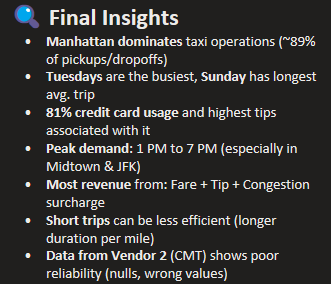
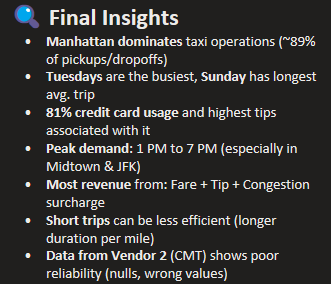
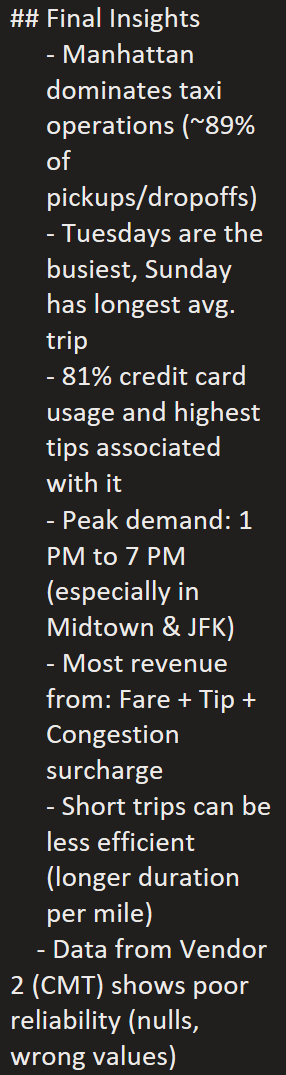
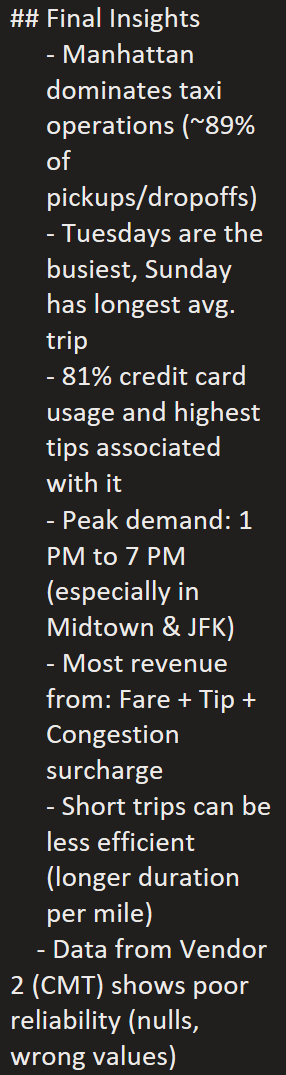
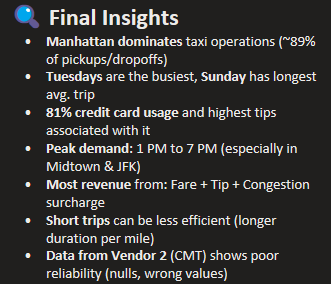
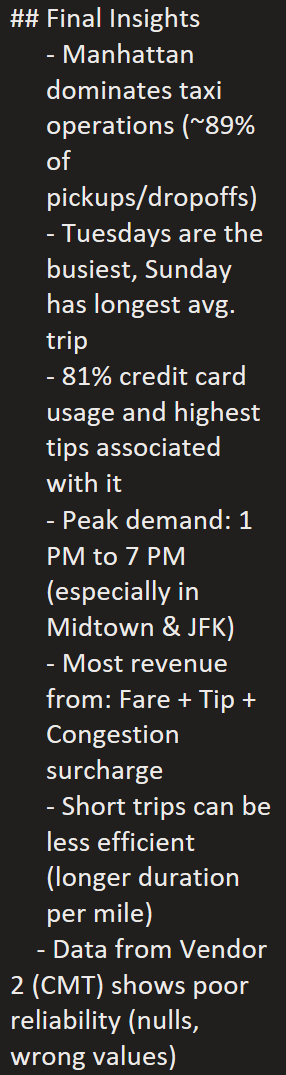

<a id='reccomend'></a>
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h1 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  🧩 5. Recommendations
</h1>



## Data Governance:

    - Flag and review data submitted by Vendor 2. Encourage better validation on their end.

    - Filter out extreme outliers using median + 2×std logic for a more robust analysis.

## Operational Optimization:

    - Allocate more taxis to Midtown and airport routes during peak midday and evening hours.

    - Consider improving route optimization for short trips with high duration-per-mile inefficiency.

## Policy Insights:

    - Investigate fare asymmetry between airport routes to ensure fairness in toll and surcharge application.

    - Promote credit card or digital payment incentives—these trips consistently show higher tip amounts.

## Customer Service Enhancements:

    - Deploy more vehicles in high-demand time slots and areas: Tuesdays, 1–7 PM in Midtown and JFK.

    - Explore ride pooling or discounted group fares in areas with low occupancy efficiency.

## Fare Structure Transparency:

    - Educate passengers on surcharge breakdowns (e.g., congestion fees, tolls, airport fees).

<a id='conclusion'></a>
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h1 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  📄 6. Conclusion
</h1>

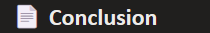
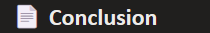
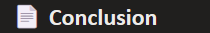

#### January 2023 Yellow Taxi data provides a detailed snapshot of NYC’s urban mobility. The findings highlight that Manhattan is the pulse of city movement, especially during midday and evening, while airport routes remain top revenue generators. However, data quality concerns—especially from certain vendors—must be addressed to maintain analytical reliability. By targeting high-efficiency zones and optimizing fare structures, the city can improve passenger experience, taxi availability, and fare fairness.

<a id='conclusion'></a>
<div style="background-color: #FFB121; padding: 25px; border-radius: 10px;">
<h1 style="color: #2C2C2C; padding-bottom: 5px;text-align:center">
  THANK YOU!
</h1>
